In [1]:
!pip install face_recognition

In [0]:
import face_recognition
import os
import cv2

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
KNOWN_FACES_DIR = "/usr/face_rec/known_faces/"
UNKNOWN_FACES_DIR = "/usr/face_rec/unknown_faces/"
TOLERANCE = 0.6
FRAME_THICKNESS = 3 
FONT_THICKNESS = 2
MODEL = "cnn"

In [10]:
print("loading known faces")

known_faces= []
known_names= []

loading known faces


In [11]:
os.listdir(KNOWN_FACES_DIR)

['Robin_Williams', '.ipynb_checkpoints']

In [0]:
name = "Robin_Williams"
for filename in os.listdir(KNOWN_FACES_DIR+"/"+name):
  image = face_recognition.load_image_file(KNOWN_FACES_DIR+name+'/'+filename)
  encoding = face_recognition.face_encodings(image)[0]
  image = face_recognition.face_encodings(image)
  known_faces.append(encoding)
  known_names.append(name)

processing unknown faces
download5.jpg


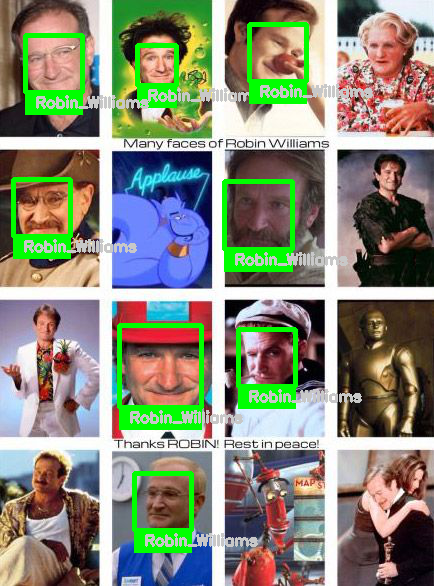

download.jpeg


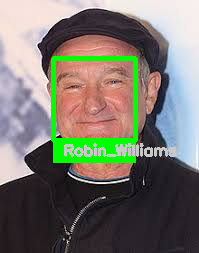

download4.jpeg


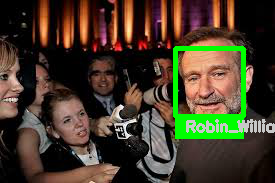

download3.jpeg


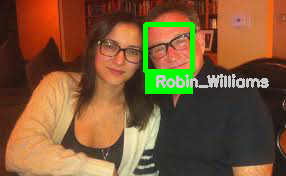

In [13]:
print("processing unknown faces")
for filename in os.listdir(UNKNOWN_FACES_DIR):
	print(filename)
	image = face_recognition.load_image_file(UNKNOWN_FACES_DIR+"/"+filename)
	locations = face_recognition.face_locations(image, model = MODEL)
	encodings = face_recognition.face_encodings(image, locations)
	image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
	
	for face_encoding, face_location in zip(encodings, locations):
		results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)
		match = None
		if True in results:
			match = known_names[results.index(True)]
			#print("Match found:",match)
			top_left = (face_location[3], face_location[0])
			bottom_right = (face_location[1], face_location[2])
			color =[0,255,0]
			cv2.rectangle(image, top_left, bottom_right, color, FRAME_THICKNESS)
			
			top_left = (face_location[3], face_location[2])
			bottom_right = (face_location[1], face_location[2]+22)
			cv2.rectangle(image, top_left, bottom_right, color, cv2.FILLED)
			cv2.putText(image, match, (face_location[3]+10,face_location[2]+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200,200,200), FONT_THICKNESS)
	
	cv2_imshow(image)		
	cv2.waitKey(10000)
	 #cv2.destroyWindow(filename)